   Size  Location  Number of Rooms   Price
0  1500     urban                3  350000
1  1800  suburban                4  400000
2  1200     rural                2  250000
3  2000     urban                4  450000
4  2200  suburban                5  500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             57 non-null     int64 
 1   Location         57 non-null     object
 2   Number of Rooms  57 non-null     int64 
 3   Price            57 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.9+ KB
None
              Size  Number of Rooms          Price
count    57.000000        57.000000      57.000000
mean   1878.947368         3.666667  393333.333333
std     409.152802         0.893095   87634.250751
min    1000.000000         2.000000  230000.000000
25%    1600.000000         3.000000  330000.000000
50%    19

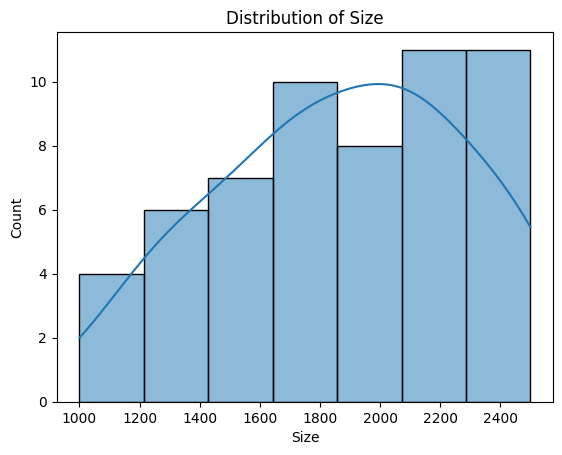

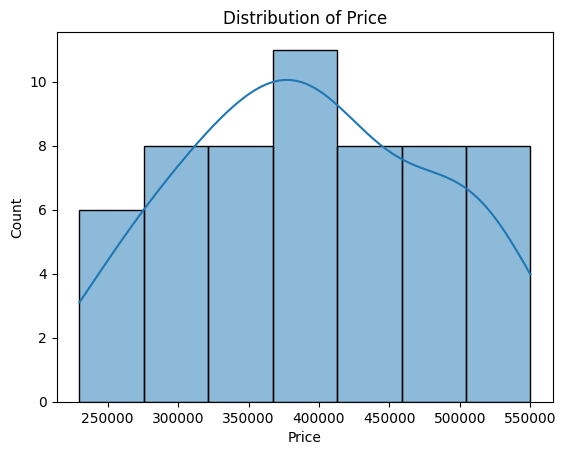

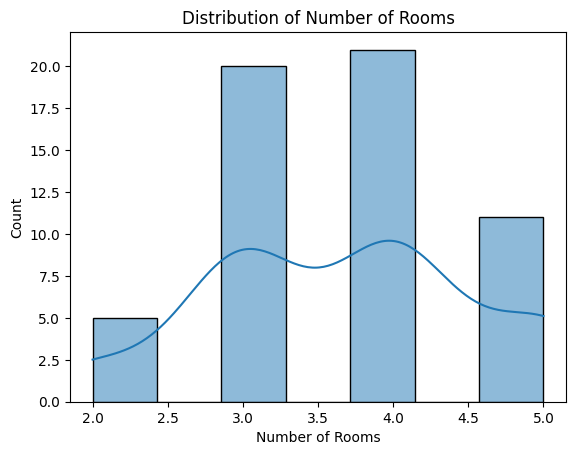

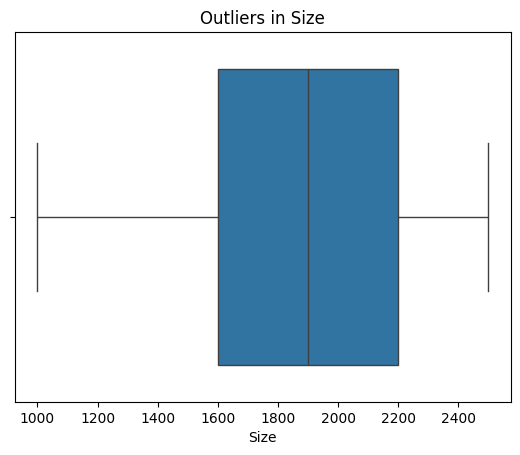

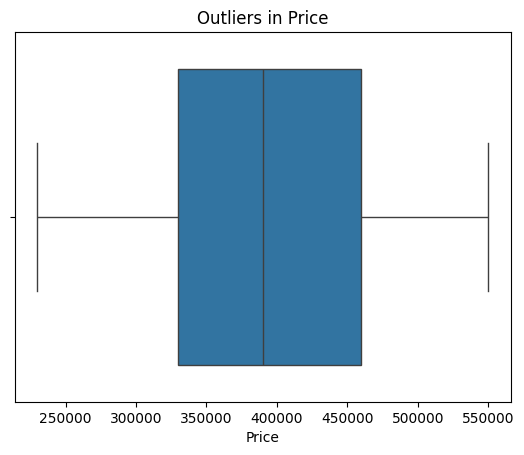

Root Mean Squared Error (RMSE): 23420.344692250383
R²: 0.9261676887712188
             Feature   Coefficient
4     Location_urban  57758.962688
0               Size  28252.383456
3  Location_suburban  26186.061602
1    Number of Rooms  20593.828728
2     Location_rural -83945.024290
    Actual Price  Predicted Price
0         350000    403203.660177
5         230000    225128.238163
30        430000    444792.814924
13        360000    364356.472084
34        525000    488857.722728


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(r'C:\Users\dell\Documents\house_prices.csv')

# Step 1: Inspect the Dataset
print(df.head())  # View the first few rows of the dataset
print(df.info())  # Check for missing values and data types
print(df.describe())  # Basic statistics for numerical columns

# Step 2: Handle missing values
# Fill missing values in numeric columns with the mean of each column
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values in categorical columns with the most frequent value (mode)
categorical_columns = df.select_dtypes(include=[object]).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 3: Analyze Distributions
# Visualizing the distributions of Size, Price, and Number of Rooms
sns.histplot(df['Size'], kde=True)
plt.title('Distribution of Size')
plt.show()

sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

sns.histplot(df['Number of Rooms'], kde=True)
plt.title('Distribution of Number of Rooms')
plt.show()

# Step 4: Identify Outliers using boxplots
sns.boxplot(x=df['Size'])
plt.title('Outliers in Size')
plt.show()

sns.boxplot(x=df['Price'])
plt.title('Outliers in Price')
plt.show()

# Step 5: Data Preprocessing

# Feature Encoding (One-Hot Encoding for categorical columns)
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable

# Define preprocessing for numerical and categorical data
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=[object]).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scaling numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encoding categorical features
    ])

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Linear Regression Model using a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('regressor', LinearRegression())  # Apply Linear Regression
])

# Train the model
model.fit(X_train, y_train)

# Step 8: Model Evaluation
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R² (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Step 9: Feature Insights (Checking the coefficients of the linear regression model)
# Extracting feature importances from the trained model
encoded_columns = numeric_features.tolist() + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
coefficients = model.named_steps['regressor'].coef_

# Displaying the importance of each feature (Size, Number of Rooms, Location)
feature_importance = pd.DataFrame({
    'Feature': encoded_columns,
    'Coefficient': coefficients
})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

# Step 10: Predictions vs Actual Prices
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(predictions_df.head())

